In [3]:
#|default_exp app

# Gram stained bacteria Classifier

In [1]:
#|export
from fastai.vision.all import *
import gradio as gr

#def which_bacteria(x): return x[0].isupper

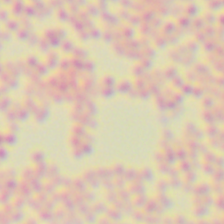

In [5]:
im = PILImage.create('Veionella_sample.png')
im.thumbnail((244,244))
im

In [16]:
#this is only for local windows devices
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [17]:
#|export
learn = load_learner('Bacteria-Classifier.pkl')

In [18]:
learn.predict(im)

('Veionella',
 TensorBase(32),
 TensorBase([2.8252e-10, 4.4268e-10, 1.7102e-08, 3.9701e-09, 2.0528e-10, 3.6430e-10,
         3.3014e-10, 4.0905e-12, 2.0536e-09, 4.4373e-09, 1.8908e-09, 2.7296e-09,
         2.0407e-09, 4.2650e-09, 1.9036e-11, 1.4979e-11, 3.7114e-10, 7.3161e-10,
         1.5772e-11, 3.7359e-10, 1.5850e-12, 7.8666e-10, 3.6061e-09, 1.3573e-10,
         2.5014e-12, 6.7269e-10, 7.9661e-11, 2.8282e-10, 1.6020e-10, 4.3308e-12,
         3.5873e-12, 2.6547e-07, 1.0000e+00]))

In [19]:
#|export
categories = ('Acinetobacter.baumanii',
'Actinetobacter.israeli',
'Bacteroides.fragilis',
'Bifidobacterium.spp',
'Candida.albicans',
'Clostridium.perfringens',
'Enterococcus.faecalis',
'Enterococcus.faecium',
'Escherichia.coli',
'Fusobacterium',
'Lactobacillus.casei',
'Lactobacillus.crispatus',
'Lactobacillus.delbrueckii',
'Lactobacillus.gasseri',
'Lactobacillus.jehnsenii',
'Lactobacillus.johnsonii',
'Lactobacillus.paracasei',
'Lactobacillus.plantarum',
'Lactobacillus.reuteri',
'Lactobacillus.rhamnosus',
'Lactobacillus.salivarius',
'Listeria.monocytogenes',
'Micrococcus.spp',
'Neisseria.gonorrhoeae',
'Porfyromonas.gingivalis',
'Propionibacterium.acnes',
'Proteus',
'Pseudomonas.aeruginosa',
'Staphylococcus.aureus',
'Staphylococcus.epidermidis',
'Staphylococcus.saprophiticus',
'Streptococcus.agalactiae',
'Veionella')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories,map(float,probs)))

In [20]:
classify_image(im)

{'Acinetobacter.baumanii': 2.8252464256972587e-10,
 'Actinetobacter.israeli': 4.4268086418775e-10,
 'Bacteroides.fragilis': 1.710155572709482e-08,
 'Bifidobacterium.spp': 3.970113127138575e-09,
 'Candida.albicans': 2.0527600452791006e-10,
 'Clostridium.perfringens': 3.643012003173851e-10,
 'Enterococcus.faecalis': 3.3014477263115793e-10,
 'Enterococcus.faecium': 4.090495303588071e-12,
 'Escherichia.coli': 2.0535835254520407e-09,
 'Fusobacterium': 4.437259448764053e-09,
 'Lactobacillus.casei': 1.890767542533922e-09,
 'Lactobacillus.crispatus': 2.7296105375995694e-09,
 'Lactobacillus.delbrueckii': 2.0407333600758193e-09,
 'Lactobacillus.gasseri': 4.264959940769586e-09,
 'Lactobacillus.jehnsenii': 1.9036478990375194e-11,
 'Lactobacillus.johnsonii': 1.497905618985662e-11,
 'Lactobacillus.paracasei': 3.71142921951062e-10,
 'Lactobacillus.plantarum': 7.31609328674665e-10,
 'Lactobacillus.reuteri': 1.5771986147661288e-11,
 'Lactobacillus.rhamnosus': 3.7358680038401815e-10,
 'Lactobacillus.sal

In [36]:
#|export
image = gr.inputs.Image(shape=(244,244))
label = gr.outputs.Label(3)
examples = ['Fusobacterium_sample.png','Veionella_sample.png','Clostridium.perfringens_sample.png']

intf = gr.Interface(fn=classify_image,inputs=image,outputs=label, examples=examples)
intf.launch(inline=False)

c:\Users\lu_41\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\lu_41\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\lu_41\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\lu_41\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7862/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x2963356c880>, 'http://127.0.0.1:7862/', None)

In [25]:
m = learn.model
ps = list(m.parameters())
ps[1]

Parameter containing:
tensor([2.4083e-01, 2.9210e-01, 3.1949e-01, 2.7413e-01, 2.1801e-01, 3.0804e-01,
        2.2761e-01, 2.2880e-01, 2.0703e-01, 2.8148e-01, 2.0145e-01, 3.1571e-01,
        1.8028e-01, 1.1246e-08, 1.9924e-01, 2.1020e-01, 2.3916e-01, 2.1909e-01,
        1.9181e-01, 3.1467e-01, 1.9562e-01, 2.2964e-01, 2.2110e-01, 2.1577e-01,
        2.4192e-01, 2.9729e-01, 2.3643e-01, 2.1235e-01, 1.4611e-01, 2.9082e-01,
        2.2890e-01, 9.3820e-02, 4.3825e-01, 2.0828e-01, 2.8203e-01, 3.5770e-01,
        2.8981e-01, 2.5334e-01, 2.4187e-01, 2.1921e-01, 3.8972e-01, 2.0937e-01,
        3.6529e-01, 3.3431e-01, 5.0971e-01, 1.9275e-01, 2.4361e-01, 2.6977e-01,
        3.8868e-01, 2.0145e-01, 2.1702e-01, 2.6905e-01, 4.9756e-01, 2.3609e-01,
        2.1257e-01, 2.5982e-01, 2.3105e-01, 1.7824e-01, 4.5392e-01, 1.7737e-01,
        2.4714e-01, 2.4964e-01, 3.8091e-01, 1.9392e-01], requires_grad=True)

In [26]:
ps[0].shape

torch.Size([64, 3, 7, 7])

In [27]:
ps[0]

Parameter containing:
tensor([[[[ 1.3298e-02,  1.4631e-02, -1.5339e-02,  ..., -4.0714e-02,
           -4.2829e-02, -7.0504e-02],
          [ 3.9812e-03,  5.6611e-03,  1.4846e-02,  ...,  2.2978e-03,
           -2.0793e-02, -3.8354e-02],
          [ 2.2174e-02,  2.3387e-02,  1.5957e-02,  ...,  1.0285e-01,
            6.2753e-02,  5.2112e-02],
          ...,
          [-1.0816e-03,  2.7573e-02, -1.0250e-02,  ..., -1.2719e-01,
           -7.6566e-02,  7.8838e-03],
          [ 3.4208e-03,  4.7826e-02,  6.1901e-02,  ...,  2.4257e-02,
           -3.3625e-02, -1.5705e-02],
          [-8.0135e-02, -3.2350e-02, -1.7920e-02,  ...,  3.5325e-02,
            2.2467e-02,  1.7344e-03]],

         [[-1.8429e-02,  1.1476e-02,  2.3909e-02,  ...,  5.3802e-02,
            4.4070e-02, -9.4505e-03],
          [-7.7502e-03,  1.8901e-02,  6.7933e-02,  ...,  1.5946e-01,
            1.4593e-01,  1.1981e-01],
          [-4.6060e-02, -7.6070e-02, -8.9690e-02,  ...,  1.2099e-01,
            1.6691e-01,  1.7599e-01]